In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_Pulchowk = pd.read_csv('.\\Data\\pulchowk-2024-05-01-2024.csv')

In [3]:
data_Pulchowk.isna().sum(axis=0)

Time (NPT)    0
PM2.5         0
dtype: int64

In [4]:
data_Pulchowk['Time (NPT)'] =pd.to_datetime(data_Pulchowk['Time (NPT)'])

In [5]:
display(data_Pulchowk)

,Time (NPT),PM2.5
0,2024-05-01 00:00:00,39.660
1,2024-05-01 01:00:00,45.848
2,2024-05-01 02:00:00,40.870
3,2024-05-01 03:00:00,43.520
4,2024-05-01 04:00:00,51.145
...,...,...
163,2024-05-07 19:00:00,13.333
164,2024-05-07 20:00:00,11.307
165,2024-05-07 21:00:00,11.747
166,2024-05-07 22:00:00,19.637


In [6]:
print(data_Pulchowk.get('PM2.5'))

0      39.660
1      45.848
2      40.870
3      43.520
4      51.145
        ...  
163    13.333
164    11.307
165    11.747
166    19.637
167    20.603
Name: PM2.5, Length: 168, dtype: float64


<Axes: xlabel='Time (NPT)'>

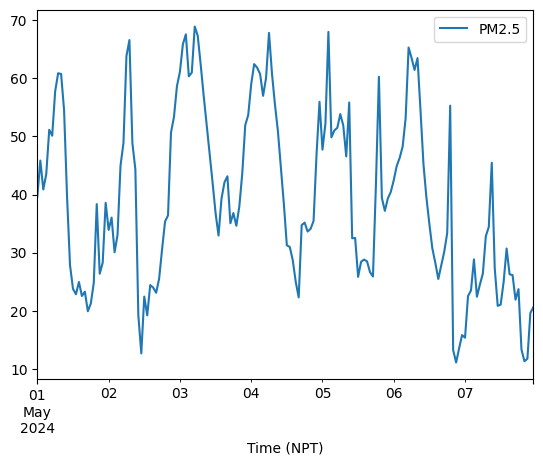

In [7]:
data_Pulchowk.plot(x='Time (NPT)',y='PM2.5')

In [8]:
data_Pulchowk['OM2.5']=data_Pulchowk['PM2.5'].replace(to_replace=' ',value=np.nan)

In [9]:
data_Pulchowk.isna().sum(axis=0)

Time (NPT)    0
PM2.5         0
OM2.5         0
dtype: int64

In [10]:
data_Pulchowk = data_Pulchowk.drop(data_Pulchowk[data_Pulchowk['PM2.5'].isna()].index)

<Axes: xlabel='Time (NPT)'>

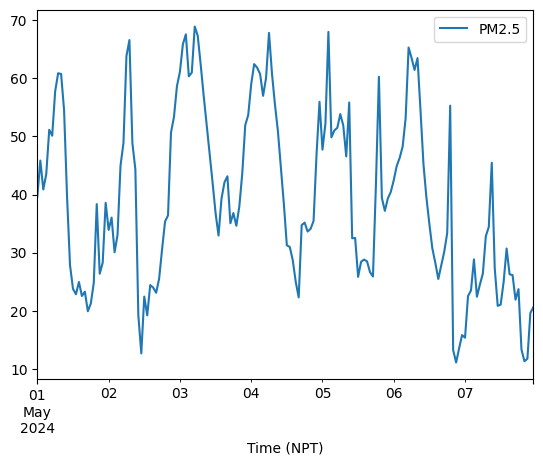

In [11]:
data_Pulchowk.plot(x='Time (NPT)',y='PM2.5')

In [12]:
data_Pulchowk.isna().sum(axis=0)

Time (NPT)    0
PM2.5         0
OM2.5         0
dtype: int64

In [13]:
from prophet import Prophet

c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [14]:
model = Prophet()

train_data=pd.DataFrame()
train_data['ds']=data_Pulchowk['Time (NPT)']
train_data['y']=data_Pulchowk['PM2.5']

In [15]:
model.fit(train_data)

15:31:56 - cmdstanpy - INFO - Chain [1] start processing


15:31:56 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future=model.make_future_dataframe(periods=7)
future.tail()

,ds
170,2024-05-10 23:00:00
171,2024-05-11 23:00:00
172,2024-05-12 23:00:00
173,2024-05-13 23:00:00
174,2024-05-14 23:00:00


In [17]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
170,2024-05-10 23:00:00,9.392993,-2.533642,21.136918,7.648283,11.018892,0.061485,0.061485,0.061485,0.061485,0.061485,0.061485,0.0,0.0,0.0,9.454478
171,2024-05-11 23:00:00,3.553571,-8.444850,15.198164,0.674055,6.054732,0.061485,0.061485,0.061485,0.061485,0.061485,0.061485,0.0,0.0,0.0,3.615056
172,2024-05-12 23:00:00,-2.285851,-14.300439,10.149086,-6.251493,1.425268,0.061485,0.061485,0.061485,0.061485,0.061485,0.061485,0.0,0.0,0.0,-2.224366
173,2024-05-13 23:00:00,-8.125274,-21.801225,4.723916,-13.286042,-3.188064,0.061485,0.061485,0.061485,0.061485,0.061485,0.061485,0.0,0.0,0.0,-8.063789
174,2024-05-14 23:00:00,-13.964696,-27.720730,-1.209831,-20.565297,-7.704460,0.061485,0.061485,0.061485,0.061485,0.061485,0.061485,0.0,0.0,0.0,-13.903211


c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\My Files\KU\5th sem\Eco-thon\The Blue Sky\venv\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

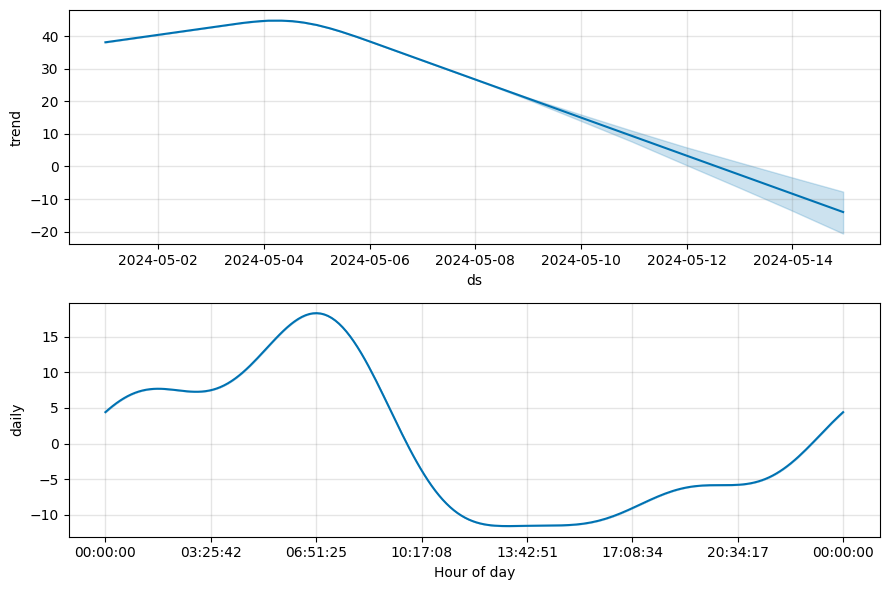

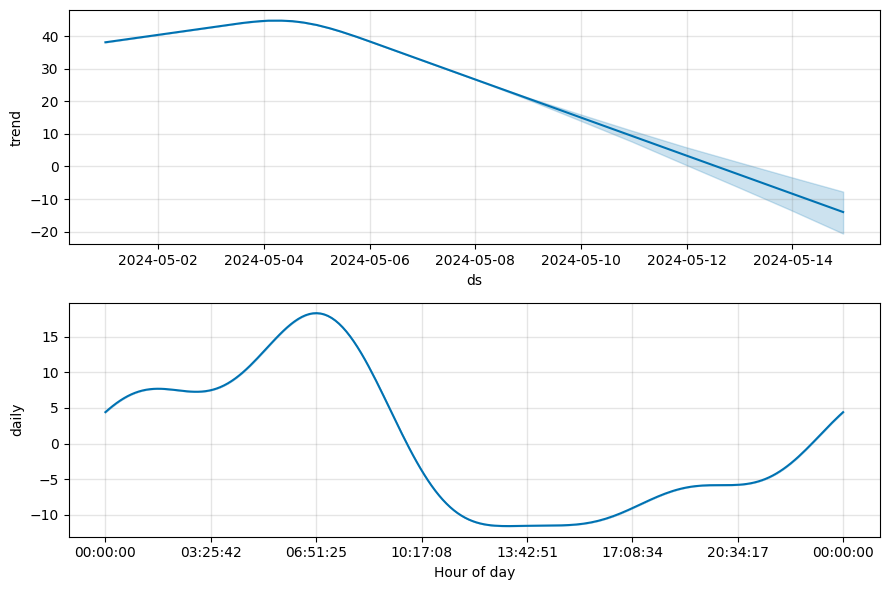

In [18]:
model.plot_components(forecast)